# Нейронные сети для начинающих часть 1. Хабр

первоисточник - https://habr.com/ru/post/312450//n/nhttps://habrahabr.ru/post/313216/

In [1]:
# В мире машинного обучения "Hello world" и это нейросеть решающая проблему исключающего или(XOR)
# Таблица исключающего или выглядит следующим образом:
# a b -> c
# 0 0 -> 0
# 1 0 -> 1
# 0 1 -> 1
# 1 1 -> 0
# т.е. на вход нейросети подаются a и b, на выходе должен получаться ответ - c.

## Рассчитаем выход нейронной сети или передачу вперед (forward pass)

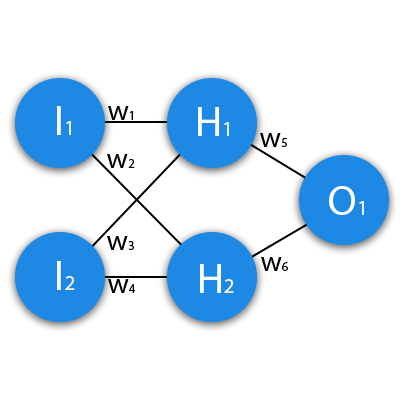

In [2]:
# рисунок нашей неронной сети (нс)
from IPython.display import Image
Image("pic1.png", width=300, height=300)

Теперь, чтобы проверить себя, подсчитаем результат, данной нейронной сети, используя сигмоид, и ее ошибку, используя MSE.

I1=1, I2=0, w1=0.45, w2=0.78 ,w3=-0.12 ,w4=0.13 ,w5=1.5 ,w6=-2.3.

In [3]:
# входной слой нейронной сети I (состоит из двух нейронов I1 и I2 - т.к. на входе мы подаем два значения)
# скрытый слой нейронной сети H (состоит из двух нейронов H1 и H2)
# выходной слой нейронной сети O (состоит из одного нейрона O1 - т.к. на выходе хотим иметь одно значение)

# у каждого из нейронов есть 2 основных параметра: входные данные (input data) и выходные данные (output data).

# для входных нейронов input data = output data
#I1_input = I1_output = I1
#I2_input = I2_output = I2
# рассмотрим один из четырех вариантов исхода, когда на вход нейросети подаются значения 1 и 0
# соответственно на выодне ожидаем 1
I1 = 1
I2 = 0

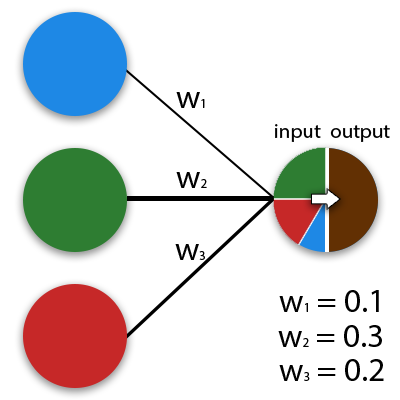

In [4]:
# рисунок вклада веса синапсов во входящих в нейрон данных
from IPython.display import Image
Image("pic3.png", width=300, height=300)

In [5]:
# у синапсов есть 1 параметр — вес
# зададим произвольно для нашей нейросети следующие веса
w1 = 0.45
w2 = 0.78
w3 = -0.12
w4 = 0.13
w5 = 1.5
w6 = -2.3

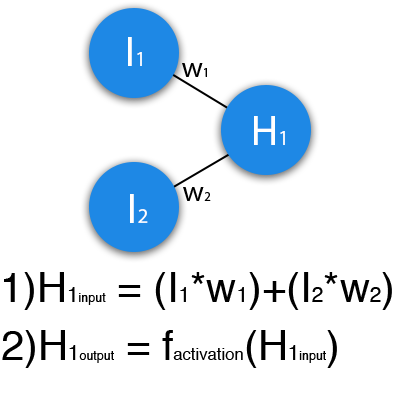

In [6]:
# формулы для расчета входных и выходных данных нейрона
from IPython.display import Image
Image("pic4.png", width=300, height=300)

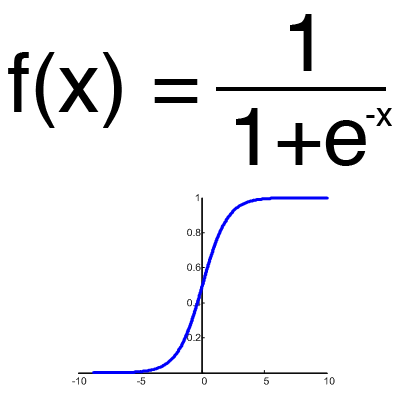

In [7]:
# формула и график функции активации на примере сигмоиды (диапазон значений [0, 1])
from IPython.display import Image
Image("pic5.png", width=300, height=300)

In [8]:
# экспортируем функцию активации (сигмоида)
from scipy.special import expit

# найдем входные данные для нейрона H1 скрытого слоя H, 
# как сумму выходных значений нейронов I1 и I2 с их весами w1 и w3 соответственно 
H1_input = I1*w1 + I2*w3
# найдем выходные данные нейорона H1, подставив входные данные в функцию активации (нормализация)
H1_output = round(expit(H1_input), 2)

# налогично для нейрона H2 
H2_input = I1*w2 + I2*w4
H2_output = round(expit(H2_input), 2)

# найдем входные данные для выходного нейрона O1
O1_input = H1_output*w5 + H2_output*w6
# найдем выходные данные для нейрона O1
O1_output = round(expit(O1_input), 2)
print('O1_output=', O1_output) 
#(т.к. на входе подавались 1 xor 0, ответ ожиидаем = 1)

O1_output= 0.34


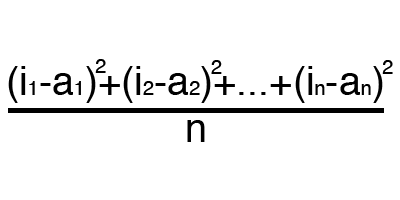

In [9]:
# формула для расчета ошибки MSE (Mean Squared Error)
from IPython.display import Image
Image("pic6.png", width=300, height=300)

In [10]:
# задаем ожидаемое выходное значение нейрона O1
O1_ideal = 1 #(т.к. на входе подавались 1 xor 0, ответ = 1)
# задаем значение текущего сета(итерации)
n = 1

# вычисляем ошибку MSE
Error = round(((O1_ideal - O1_output)**2)/n, 2)
print('Error=', Error)

Error= 0.44


In [11]:
print('Ответ далек от истины. \nВыходное значение нейрона O1_output=', 
      O1_output, '\nОшибка при ожидаемом значении O1_ideal=', O1_ideal, 
      'составила', Error, 'т.к. нейросеть не натренирована')

Ответ далек от истины. 
Выходное значение нейрона O1_output= 0.34 
Ошибка при ожидаемом значении O1_ideal= 1 составила 0.44 т.к. нейросеть не натренирована


**Вопросы**:
1. Сколько скрытых слоев нужно сделать для повышения точности ответа, как количество слоев влияет на ответ, какая зависимость.
2. Сколько нейронов в скрытом слое может быть, как это влияет на конечный результат.
3. В каких случаях применяют в качестве функции нормализации сигмоиду, в каких релу.

# Нейронные сети для начинающих часть 2. Хабр

первоисточник - https://habr.com/ru/post/313216/

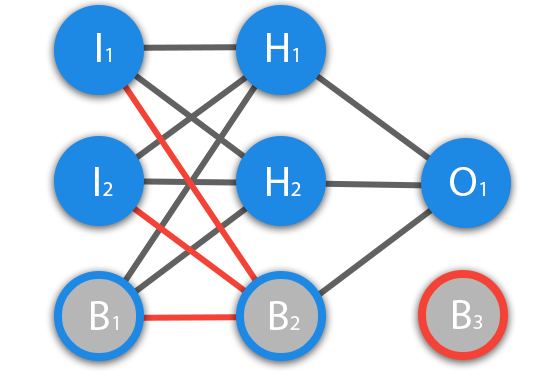

In [12]:
# рис. нейросети с нейронами смещения (B1, B2, B3).
# красным обозначены веса и нейроны, которые существовать не могут
from IPython.display import Image
Image("pic2.png", width=400, height=400)

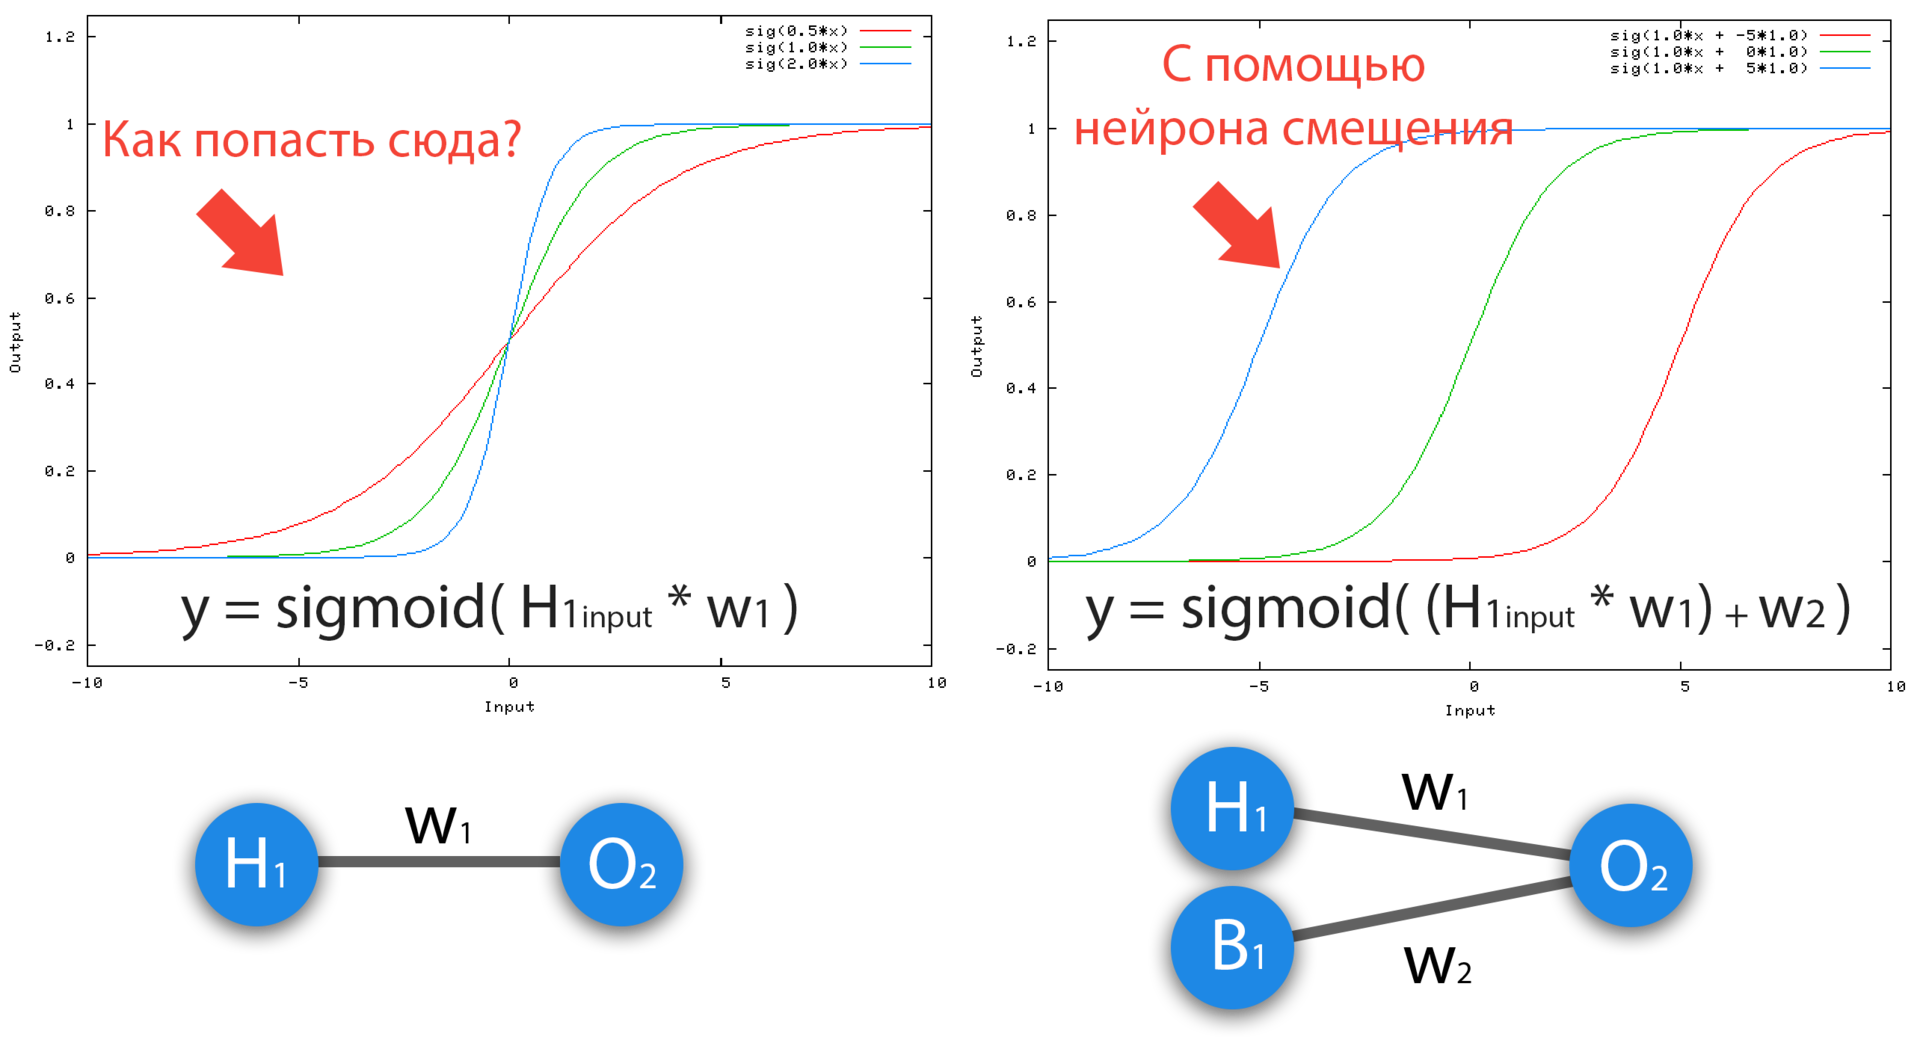

In [13]:
# рисунок показывает сдвиг функции активации с учетом наличия нейрона смешения
from IPython.display import Image
Image("pic7.png", width=600, height=600)

Text(0.5, 0, '$x$')

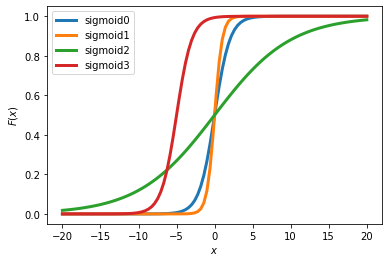

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# регулируя веса скрытых и выхожных нейронов мы меняем угол наклона функции активации
x = np.linspace(-20, 20, 100)
# строим просто сигмоид, с единичным весом
w_0 = 1
sigmoid0 = expit(x*w_0)
# строим сигмоид с весом больше 1, график приближается к вертикальной оси
w_1 = 2
sigmoid1 = expit(x*w_1)
# строим сигмоид с весом меньше 1, меняем угол наклона сигмоида
w_2 = 0.2
sigmoid2 = expit(x*w_2)

# добавим нейрон смещения или bias
# нейрон смещения обеспечивает сдвиг фенкции активации вправо или влево
# '+' влево, '-' вправо
Nbias = 5 # нейрон смещения
# построим сигмоид с учетом нейрона смещения
sigmoid3 = expit(x*w_0 + Nbias)

# нейрон смещения - это гиперпараметр, решение об использовании которого принимается экспертно,
# путем оценки результатов нс с использованием нейрона смещения и без него
  
plt.plot(x, sigmoid0, lw=3, label='sigmoid0')
plt.plot(x, sigmoid1, lw=3, label='sigmoid1')
plt.plot(x, sigmoid2, lw=3, label='sigmoid2')
plt.plot(x, sigmoid3, lw=3, label='sigmoid3')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

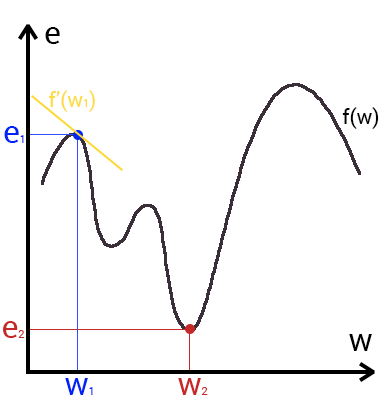

In [15]:
# на рисунке функция f(w) является зависимостью ошибки (e) от выбранного веса (w)
# точка (w1, e1) - локального минимума
# точка (w2, e2) - глобального минимума
# f'(w1) - градиент функции в точке w1
from IPython.display import Image
Image("pic8.png", width=300, height=300)

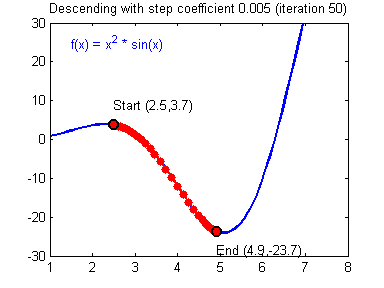

In [16]:
# визуализация нахождения локального минимума функции с использованием метода градиентного спуска
from IPython.display import Image
Image("gif2.gif", width=400, height=400)

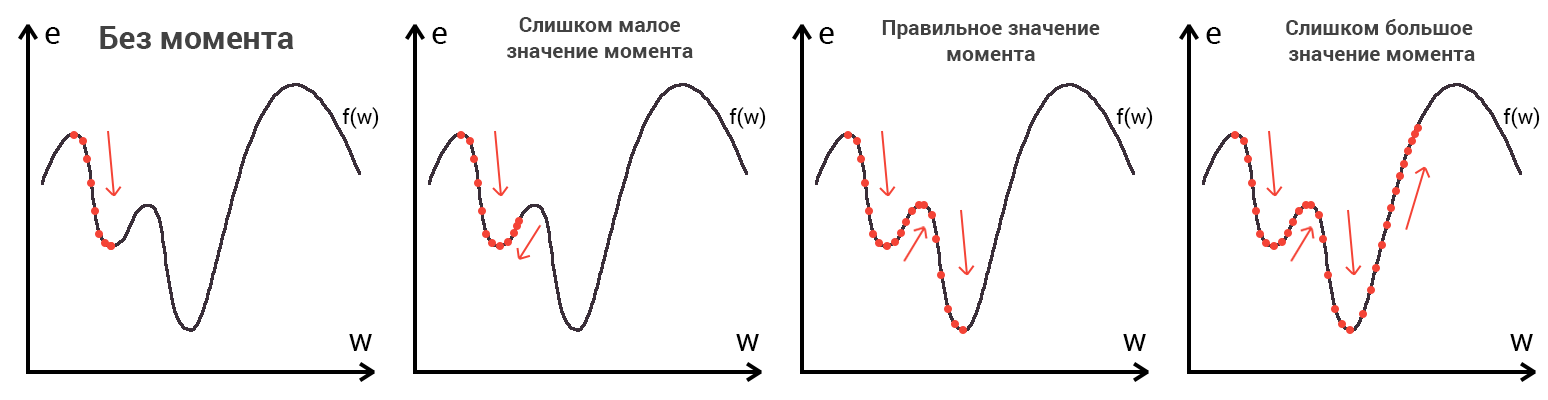

In [17]:
# момент (momentum)- еще один гиперпараметр
from IPython.display import Image
Image("pic9.png", width=800, height=800)

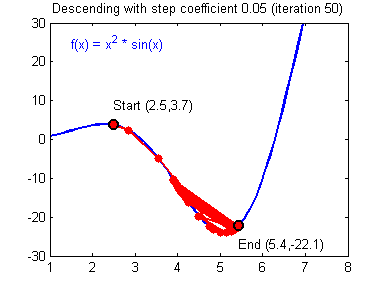

In [18]:
# визуализация неверного выбора скорости обучения (learning rate)
# слишком большая скорость обучения не позволяет найти точку минимума.
from IPython.display import Image
Image("gif3.gif", width=400, height=400)

**Итого, гиперпараметры нейронной сети:**
1. Наличие или отсутствие нейрона смещения (bias);
2. Момент (momentum);
3. Скорость обучения (learning rate).

**Метод Обратного Распространения или МОР (Backpropagation)**

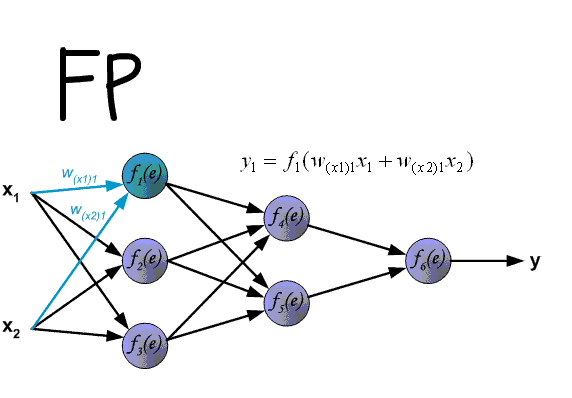

In [19]:
# визуализация Метода Обратного Распространения (Backpropagation)
from IPython.display import Image
Image("gif1.gif", width=600, height=600)

А теперь давайте подробно разберем каждый этап:

**FORWARD PASS или передача вперед (разбирали в лекции 1)**

In [20]:
# результаты предыдущей лекции
print('I1_input=', I1,
      '\nI2_input=', I2,
      '\nO1_ideal=', O1_ideal,
      '\nO1_output=', O1_output,
      '\nError=', Error)

I1_input= 1 
I2_input= 0 
O1_ideal= 1 
O1_output= 0.34 
Error= 0.44


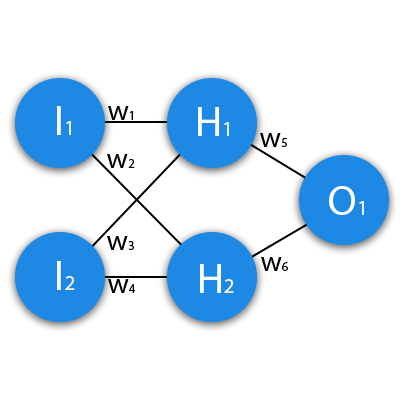

In [21]:
# напоминаю рисунок нашей неронной сети (нс)
from IPython.display import Image
Image("pic1.png", width=300, height=300)

## BACK PASS или передача назад

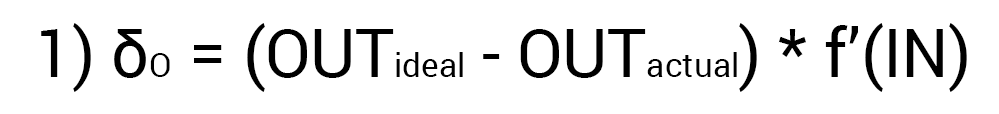

In [22]:
# формула для расчета дельты выходного (output) нейрона
from IPython.display import Image
Image("pic10.png", width=500, height=500)

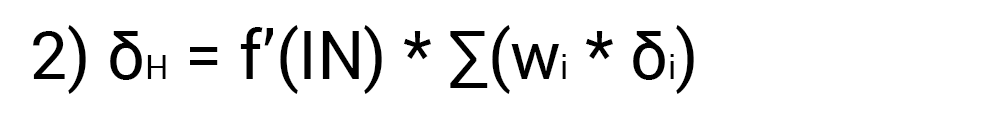

In [23]:
# формула для расчета дельты скрытого (hidden) нейрона
from IPython.display import Image
Image("pic11.png", width=500, height=500)

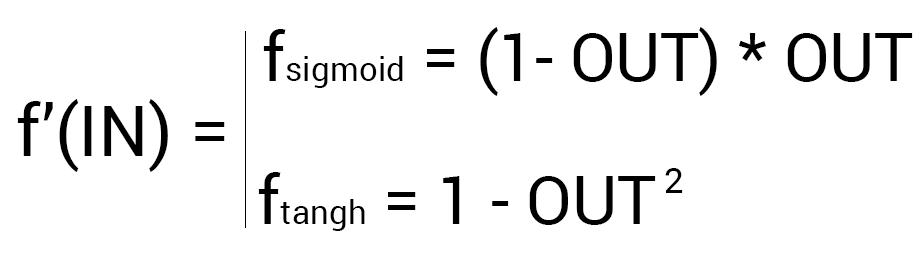

In [24]:
# производную можно упростить (для функции активации сигмоид - первая формула)
from IPython.display import Image
Image("pic12.png", width=400, height=400)

In [25]:
# найдем отклонение в точке O1 (выходной нейрон) в соответствии с формулой 1.
delta_O1 = (O1_ideal - O1_output) * ((1 - O1_output) * O1_output)
print('delta_O1=', round(delta_O1, 3))

delta_O1= 0.148


In [26]:
# найдем отклонение в точке Н1 (скрытый нейрон) в соответствии с формулой 2.
delta_H1 = ((1 - H1_output) * H1_output) * (w5 * delta_O1)
print('delta_H1=', round(delta_H1, 3))

delta_H1= 0.053


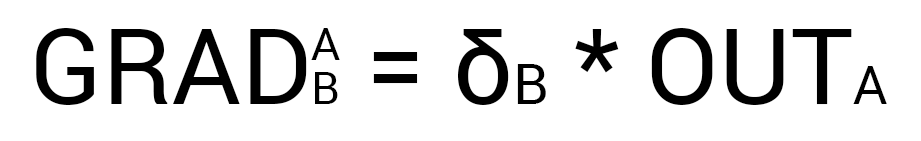

In [27]:
# теперь нужно найти градиент для каждого исходящего синапса
# используем следующую формулу, где А - точка в начале синапса, В - точка в конце синапса
from IPython.display import Image
Image("pic13.png", width=400, height=400)

In [28]:
# для нейрона H1 нужно найти градиент для w5
grad_w5 = delta_O1 * H1_output
print('grad_w5=', round(grad_w5, 3))

grad_w5= 0.09


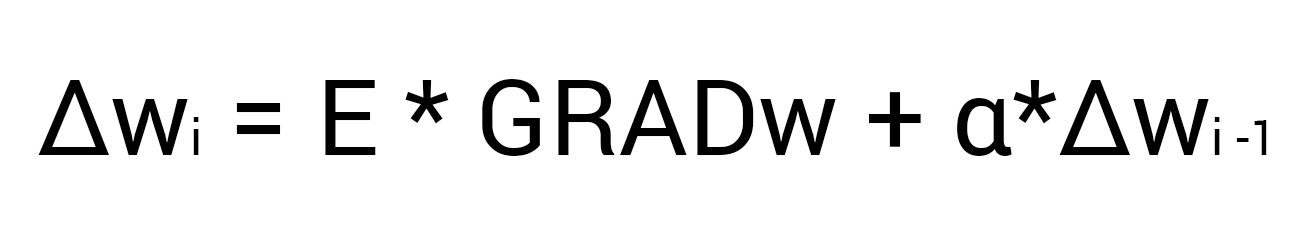

In [29]:
# теперь необходимо обновить вес синапса w5
# для этого используем формулу
from IPython.display import Image
Image("pic14.png", width=500, height=500)
# Здесь мы видим 2 константы о которых мы уже говорили, когда рассматривали алгоритм градиентного спуска:
# E (эпсилон) — скорость обучения, 
# α (альфа) — момент. 
# Переводя формулу в слова получим: изменение веса синапса равно коэффициенту скорости обучения,
# умноженному на градиент этого веса, прибавить момент умноженный на предыдущее изменение этого веса
# (на 1-ой итерации равно 0).

In [30]:
# посчитаем изменение веса w5 и обновим его значение прибавив к нему Δw5
epsilon = 0.7 # скорость обучения (learning rate)
alfa = 0.3 # момент (momentum)
delta_w5_i_1 = 0 # изменение веса синапса w5 на предыдущей итерации, для нас итерайи первая, поэтому 0

delta_w5 = epsilon * grad_w5 + alfa * delta_w5_i_1 
w5 = w5 + delta_w5
print('delta_w5=', round(delta_w5, 3), '\nw5=', round(w5, 3))

delta_w5= 0.063 
w5= 1.563


In [31]:
# для нейрона H2 нужно найти градиент для w6
grad_w6 = delta_O1 * H2_output
print('grad_w6=', round(grad_w6, 3))
# посчитаем изменение веса w6 и обновим его значение прибавив к нему Δw6
epsilon = 0.7 # скорость обучения (learning rate)
alfa = 0.3 # момент (momentum)
delta_w6_i_1 = 0 # изменение веса синапса w6 на предыдущей итерации, для нас итерайи первая, поэтому 0

delta_w6 = epsilon * grad_w6 + alfa * delta_w6_i_1 
w6 = w6 + delta_w6
print('delta_w6=', round(delta_w6, 3), '\nw6=', round(w6, 3))

grad_w6= 0.102
delta_w6= 0.072 
w6= -2.228


In [32]:
# обновим веса для w1, w2, w3, w4
delta_w1_i_1 = 0
delta_w2_i_1 = 0
delta_w3_i_1 = 0
delta_w4_i_1 = 0

delta_H2 = ((1 - H2_output) * H2_output) * (w6 * delta_O1)

grad_w1 = delta_H1 * I1
grad_w2 = delta_H2 * I1
grad_w3 = delta_H1 * I2
grad_w4 = delta_H2 * I2

delta_w1 = epsilon * grad_w1 + alfa * delta_w1_i_1
delta_w2 = epsilon * grad_w2 + alfa * delta_w2_i_1
delta_w3 = epsilon * grad_w3 + alfa * delta_w3_i_1
delta_w4 = epsilon * grad_w4 + alfa * delta_w4_i_1

w1 = w1 + delta_w1
w2 = w2 + delta_w2
w3 = w3 + delta_w3
w4 = w4 + delta_w4

print('delta_w1=', round(delta_w1, 2), '\nw1=', round(w1, 2))
print('delta_w2=', round(delta_w2, 2), '\nw2=', round(w2, 2))
print('delta_w3=', round(delta_w3, 2), '\nw3=', round(w3, 2))
print('delta_w4=', round(delta_w4, 2), '\nw4=', round(w4, 2))

delta_w1= 0.04 
w1= 0.49
delta_w2= -0.05 
w2= 0.73
delta_w3= 0.0 
w3= -0.12
delta_w4= 0.0 
w4= 0.13


In [33]:
# выполняем проверку, прямой расчет с новыми весами
# экспортируем функцию активации (сигмоида)
from scipy.special import expit

# найдем входные данные для нейрона H1 скрытого слоя H, 
# как сумму выходных значений нейронов I1 и I2 с их весами w1 и w3 соответственно 
H1_input = I1*w1 + I2*w3
# найдем выходные данные нейорона H1, подставив входные данные в функцию активации (нормализация)
H1_output = round(expit(H1_input), 2)

# налогично для нейрона H2 
H2_input = I1*w2 + I2*w4
H2_output = round(expit(H2_input), 2)

# найдем входные данные для выходного нейрона O1
O1_input = H1_output*w5 + H2_output*w6
# найдем выходные данные для нейрона O1
O1_output = round(expit(O1_input), 2)
print('O1_output=', O1_output) 
#(т.к. на входе подавались 1 xor 0, ответ ожиидаем = 1)

# задаем ожидаемое выходное значение нейрона O1
O1_ideal = 1 #(т.к. на входе подавались 1 xor 0, ответ = 1)
# задаем значение текущего сета(итерации)
n = 1

# вычисляем ошибку MSE
Error = round(((O1_ideal - O1_output)**2)/n, 3)
print('Error=', Error)

O1_output= 0.37
Error= 0.397


**Как мы видим после одной итерации МОР, нам удалось уменьшить ошибку на 0.04 (6%). Теперь нужно повторять это снова и снова, пока ваша ошибка не станет достаточно мала.**